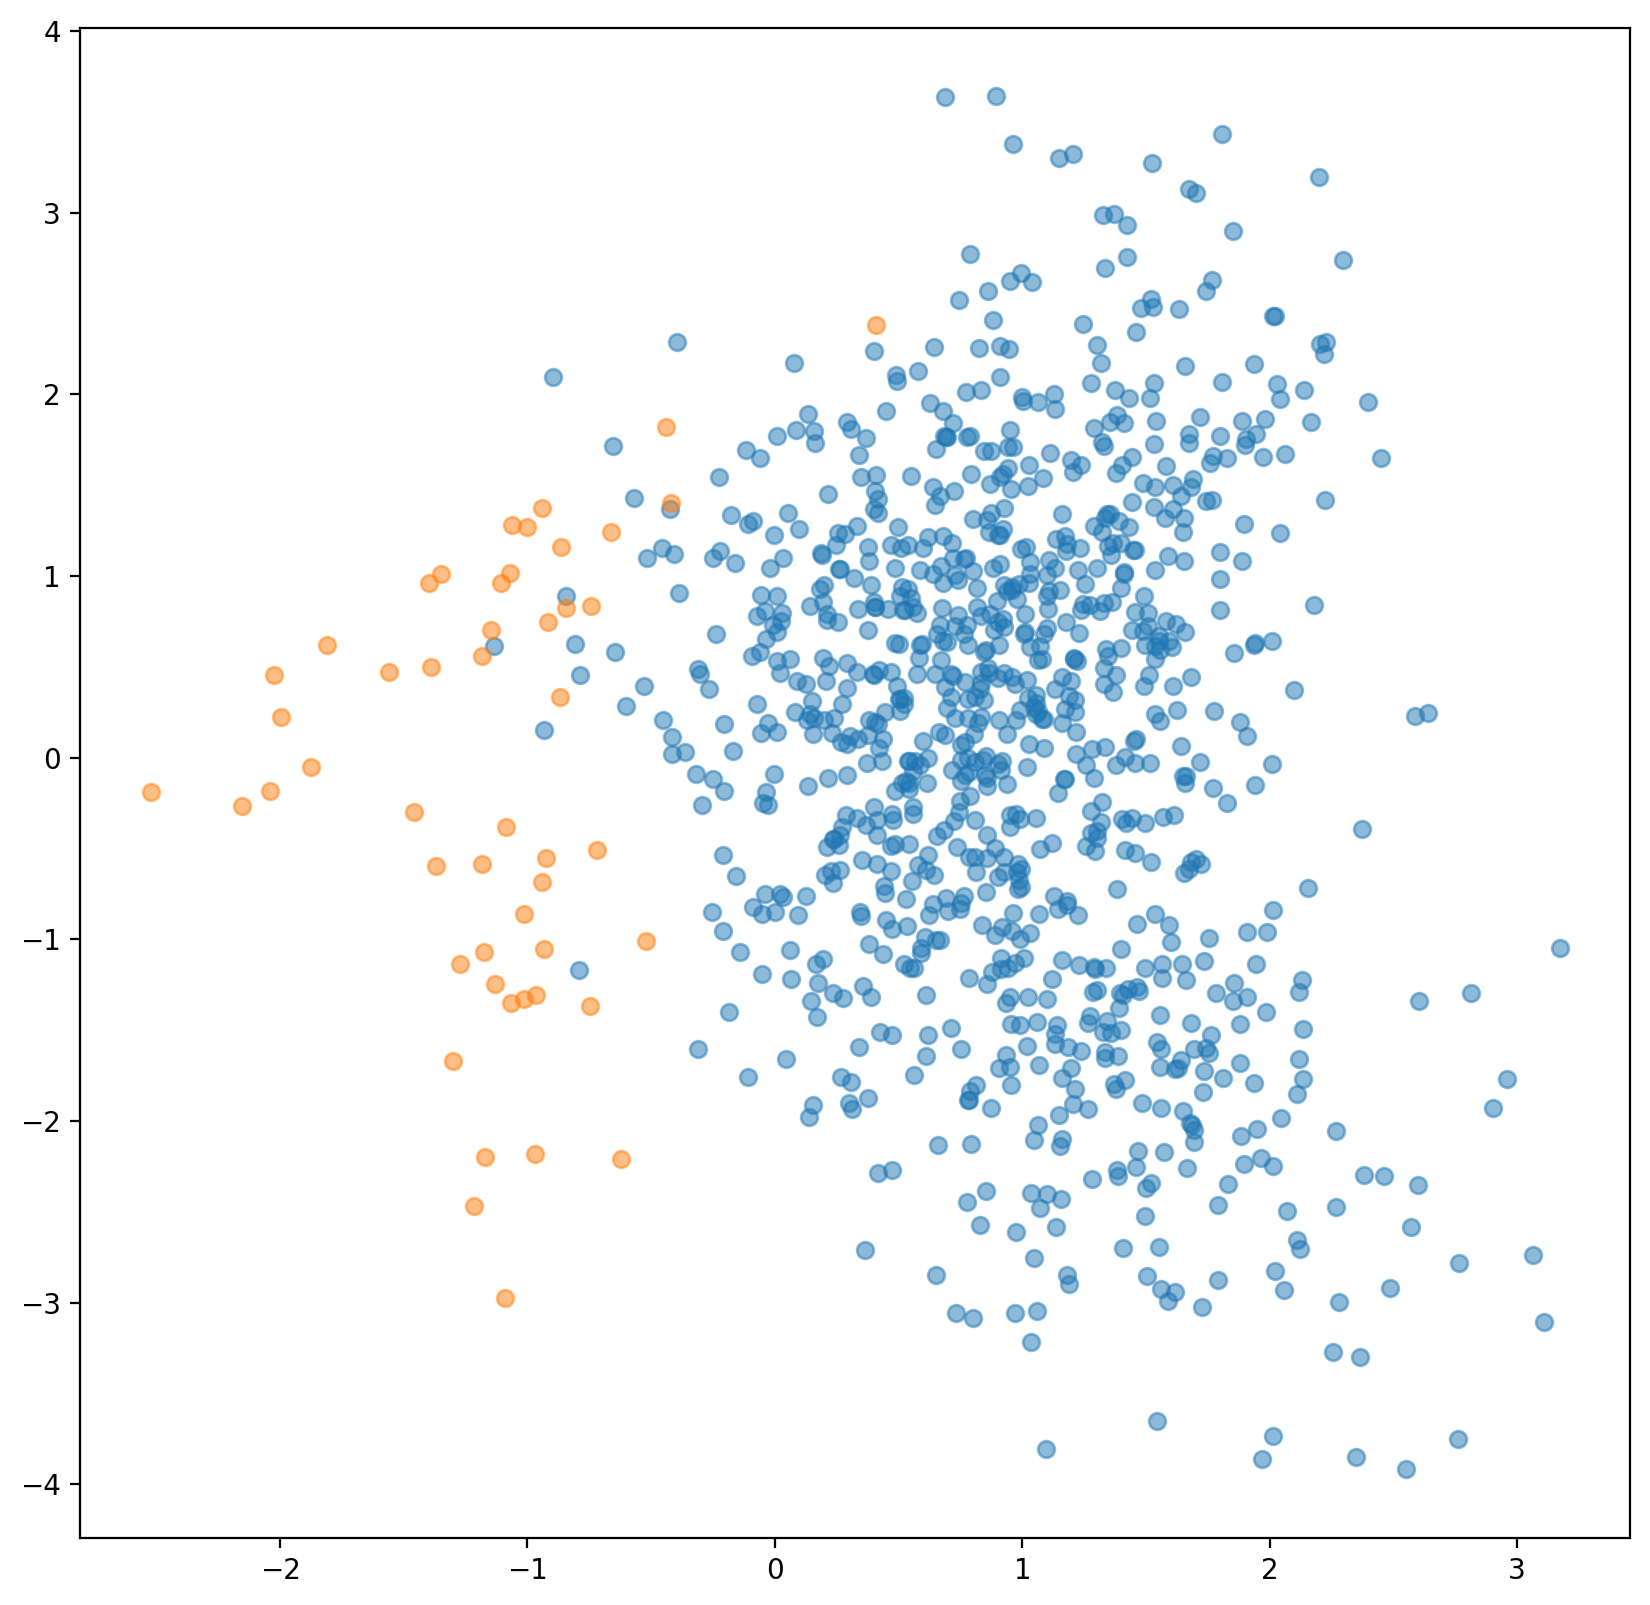

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from adasyn import adasyn, my_adasyn

#生成不平衡数据
X, y = make_classification(n_classes=2, class_sep=1,
 weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=2, n_samples=1000,random_state=0)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,10), dpi=200)
plt.scatter(X[y==1][:,0], X[y==1][:,1], alpha=0.5)
plt.scatter(X[y==0][:,0], X[y==0][:,1], alpha=0.5)
plt.savefig('data distribution.png')

In [2]:
labels = pd.Series(y).value_counts()
new_x2, new_y2 = my_adasyn(X,y,labels)

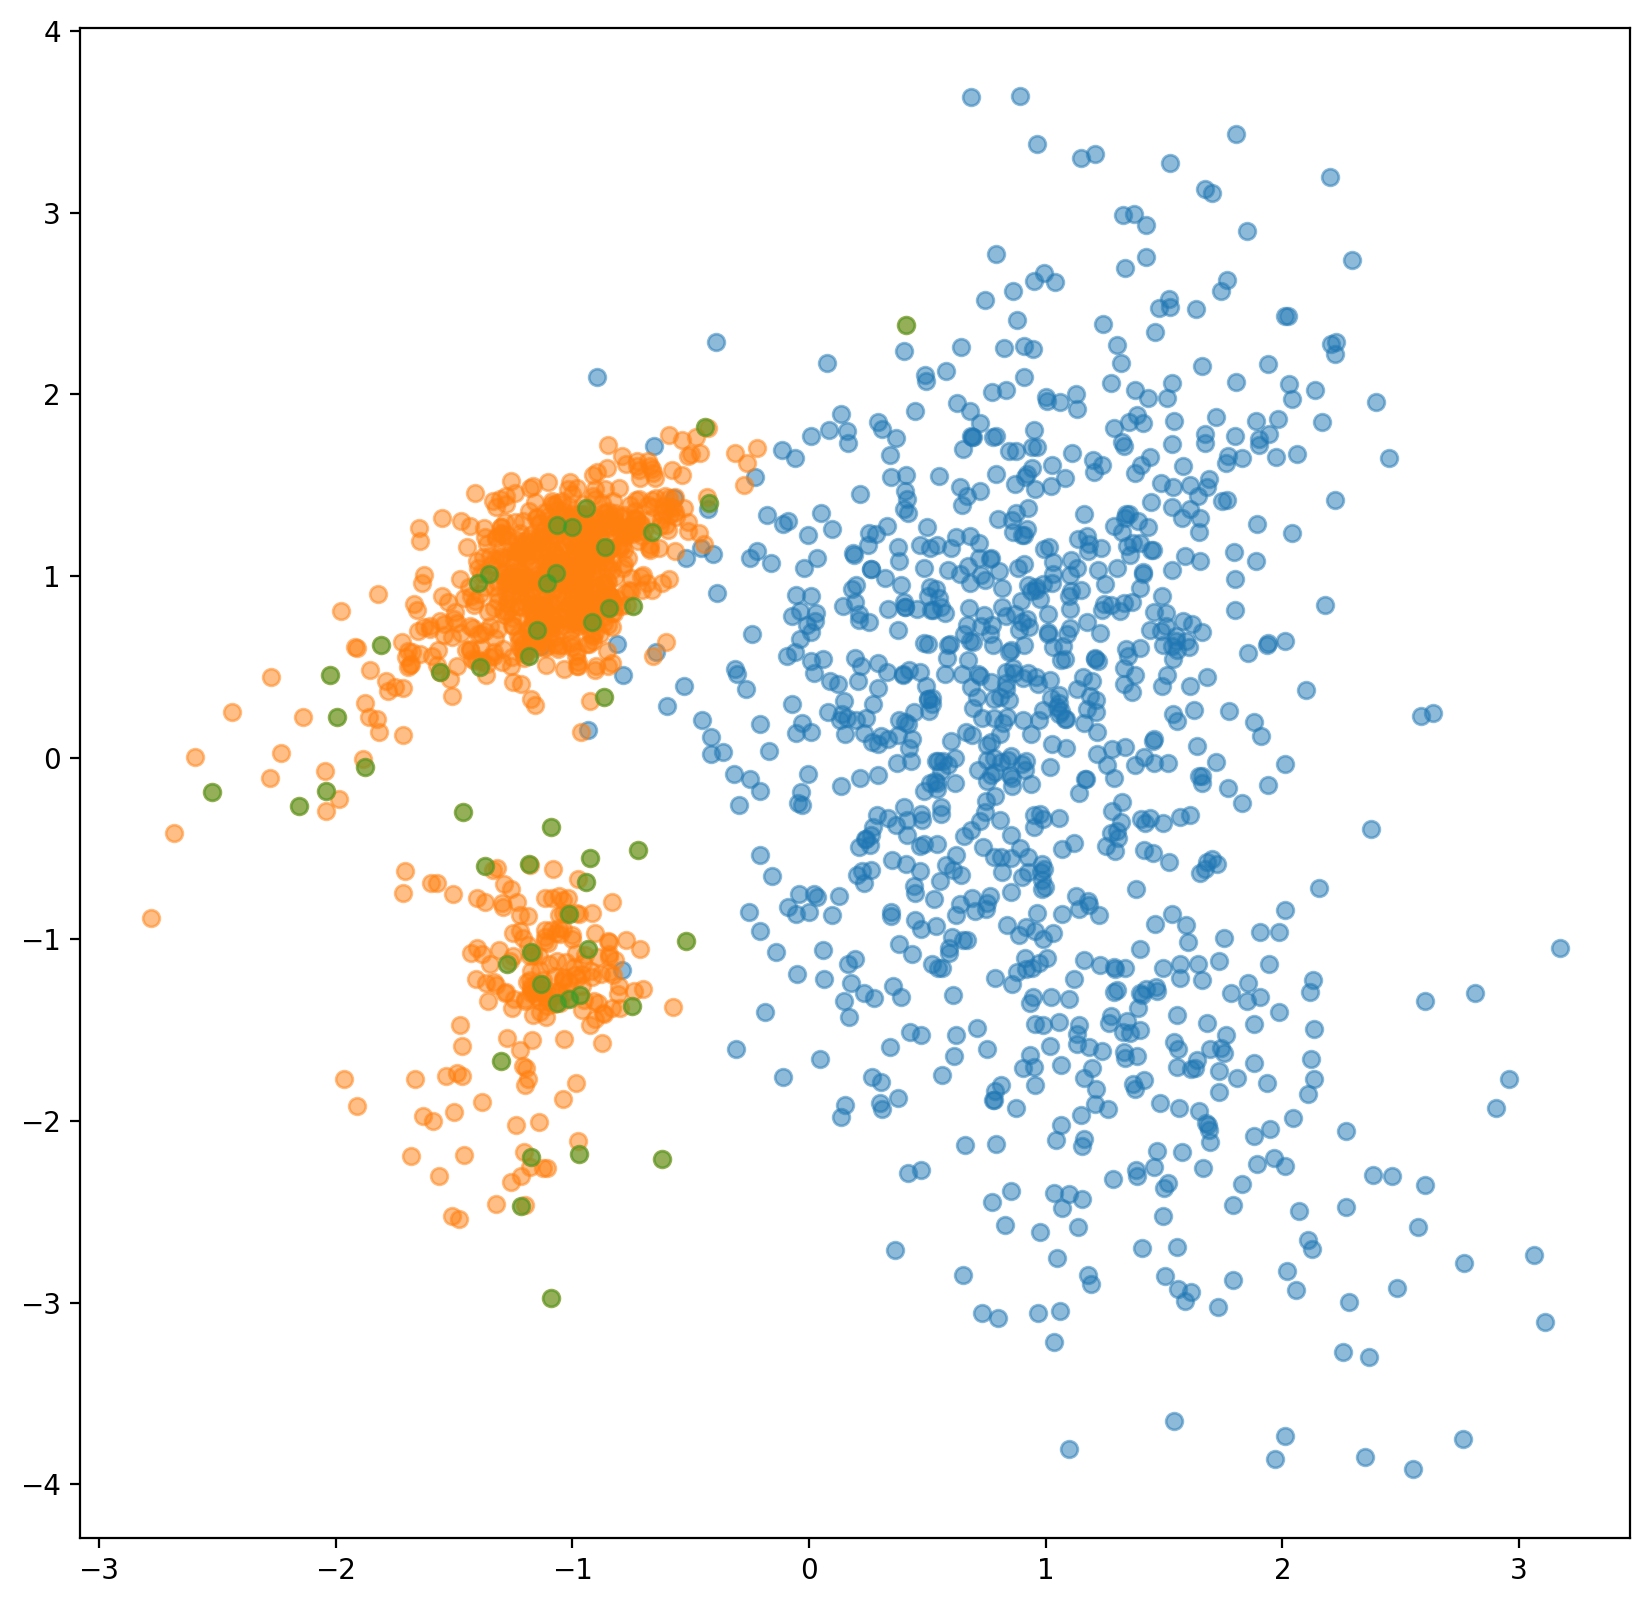

In [3]:
plt.figure(figsize=(10,10), dpi=200)
plt.scatter(new_x2[new_y2==1][:,0], new_x2[new_y2==1][:,1], alpha=0.5)
plt.scatter(new_x2[new_y2==0][:,0], new_x2[new_y2==0][:,1], alpha=0.5)
plt.scatter(X[y==0][:,0], X[y==0][:,1], alpha=0.5)
plt.savefig('my_adasyn.png')

In [4]:
labels = pd.Series(y).value_counts()
new_x, new_y = adasyn(X,y,labels)

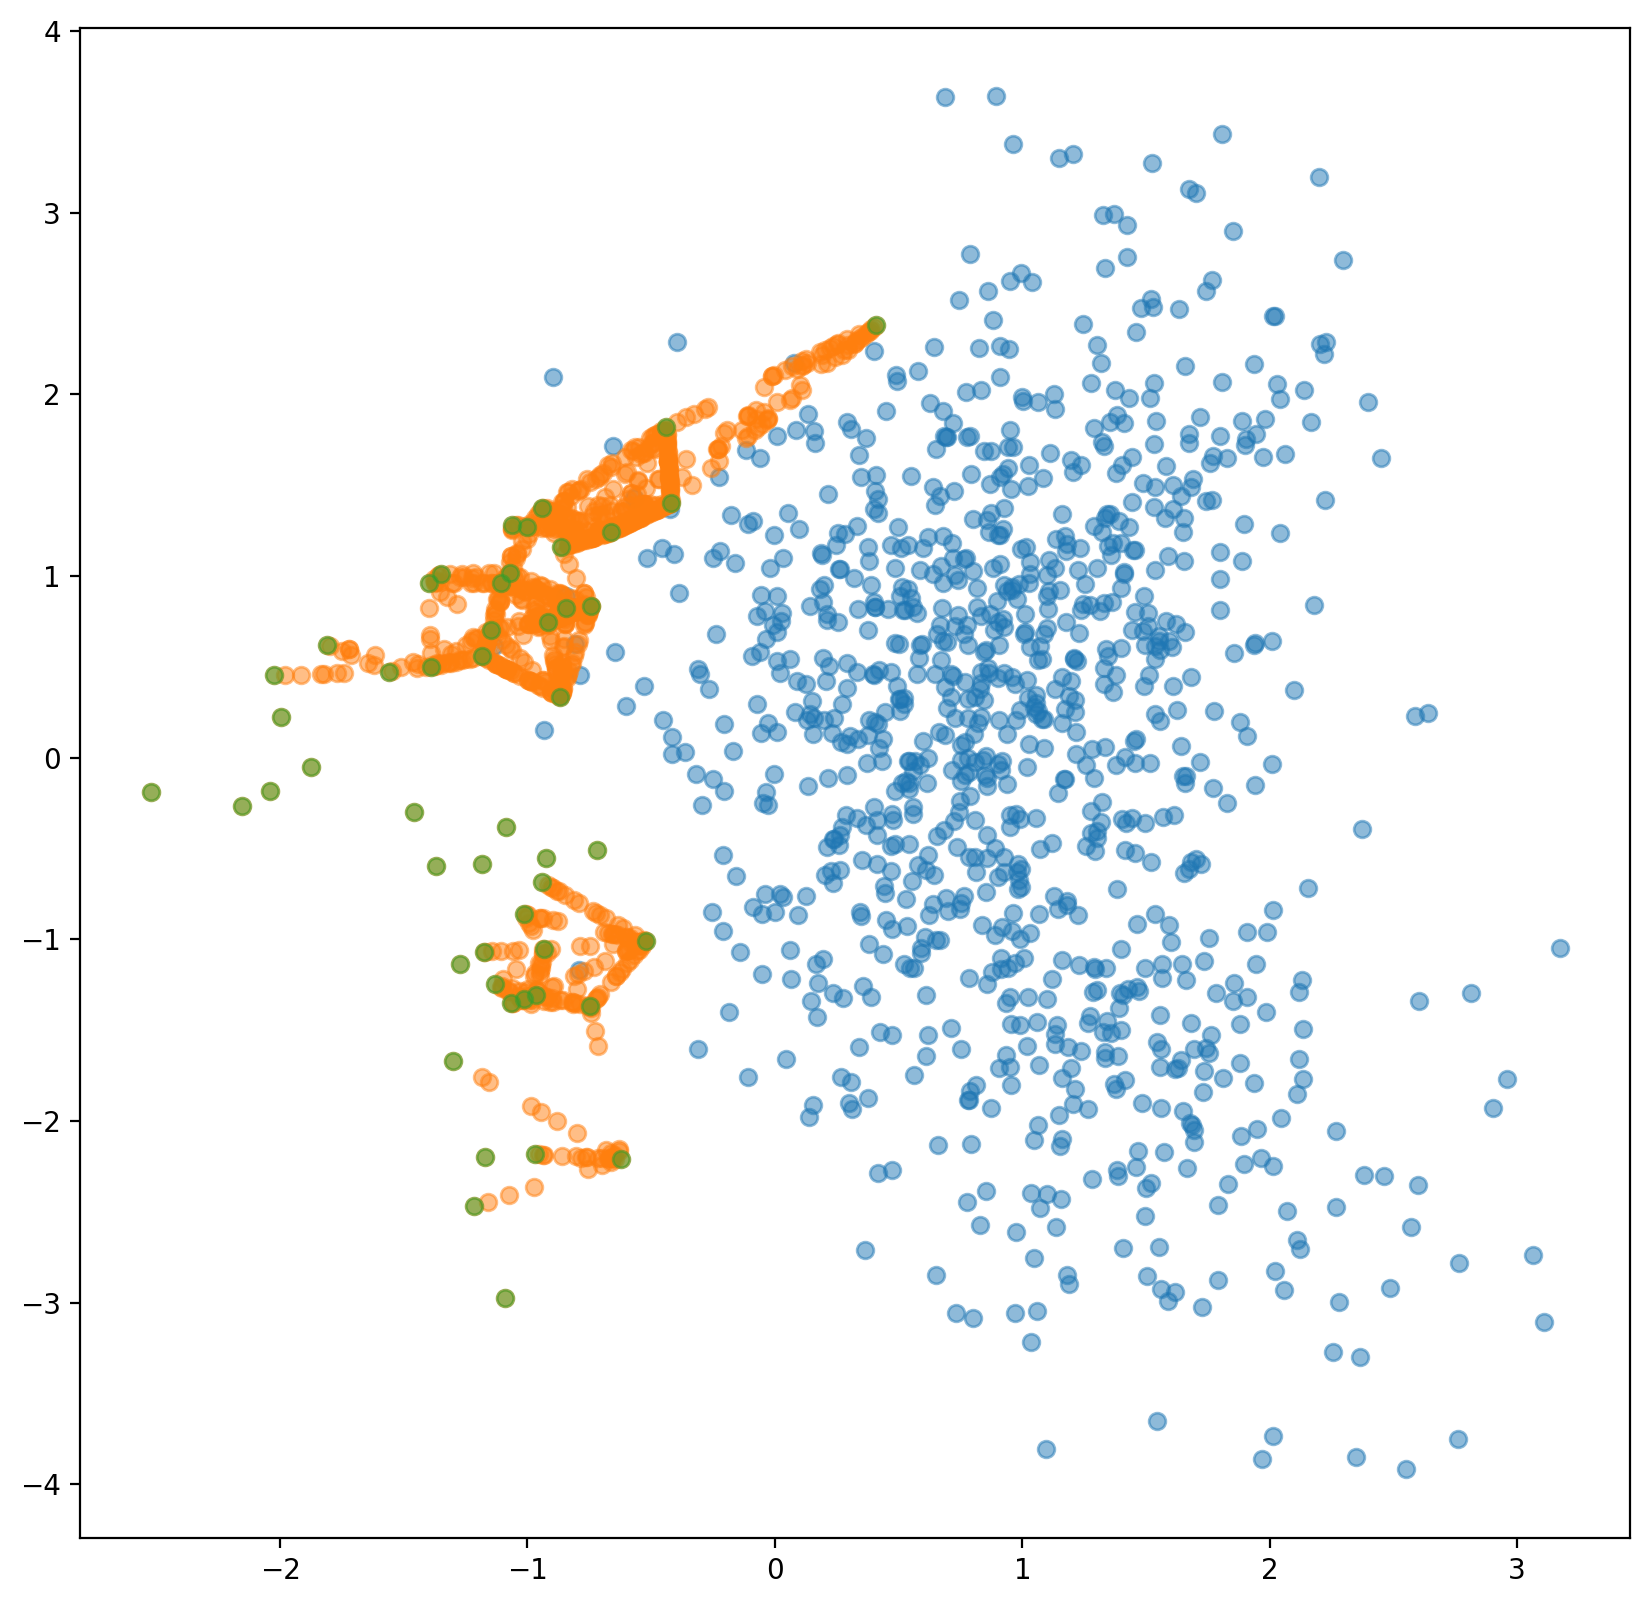

In [5]:
plt.figure(figsize=(10,10), dpi=200)
plt.scatter(new_x[new_y==1][:,0], new_x[new_y==1][:,1], alpha=0.5)
plt.scatter(new_x[new_y==0][:,0], new_x[new_y==0][:,1], alpha=0.5)
plt.scatter(X[y==0][:,0], X[y==0][:,1], alpha=0.5)
plt.savefig('adasyn.png')

In [6]:
from sklearn import tree
from test import test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.25, random_state=42)
new_x, new_y = adasyn(Xtrain,Ytrain,labels)
new_x2, new_y2 = my_adasyn(Xtrain,Ytrain,labels)
clf = tree.DecisionTreeClassifier(random_state=42)
clf1 = tree.DecisionTreeClassifier(random_state=42)
clf2 = tree.DecisionTreeClassifier(random_state=42)
clf.fit(Xtrain, Ytrain)
clf1.fit(new_x, new_y)
clf2.fit(new_x2, new_y2)



DecisionTreeClassifier(random_state=42)

In [7]:
test(clf, Xtest, Ytest, 0)


[0.98, 0.9090909090909091, 0.7142857142857143, 0.8, 0.8433617728490826]

In [8]:
test(clf1, Xtest, Ytest, 0)

[0.98, 0.8, 0.8571428571428571, 0.8275862068965518, 0.9199168295914677]

In [9]:
test(clf2, Xtest, Ytest, 0)

[0.98,
 0.7647058823529411,
 0.9285714285714286,
 0.8387096774193549,
 0.9554229062473237]

In [10]:
result = [test(clf, Xtest, Ytest, 0),test(clf1, Xtest, Ytest, 0), test(clf2, Xtest, Ytest, 0)]
metrics_name = ['OA', 'Precision', 'recall', 'F1', 'g_mean']
result = np.array(result).T.tolist()
for n, r in zip(metrics_name, result):
    print('{}: (No Process: {})   (ADASYN: {})    (My ADASYN: {})'.format(n,round(r[0], 2),round(r[1],2),round(r[2],2)))

OA: (No Process: 0.98)   (ADASYN: 0.98)    (My ADASYN: 0.98)
Precision: (No Process: 0.91)   (ADASYN: 0.8)    (My ADASYN: 0.76)
recall: (No Process: 0.71)   (ADASYN: 0.86)    (My ADASYN: 0.93)
F1: (No Process: 0.8)   (ADASYN: 0.83)    (My ADASYN: 0.84)
g_mean: (No Process: 0.84)   (ADASYN: 0.92)    (My ADASYN: 0.96)
